In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy import constants
import uncertainties as u
import uncertainties.unumpy as unp
from uncertainties import ufloat
from uncertainties.unumpy import uarray

In [2]:
#file locations
CALIBRATION_DIR = "Data\calibration_data_28_11\\"
SPECTRUM_DIR = "Data\spectrum_data_28_11\\"

#measurement info
N_MEASUREMENTS = 100
N_POINTS= 5000000

In [3]:
#Calculate the mean and standard deviations of both data sets

#calculating means
mean_spectrum_ch1_unscaled=np.zeros(N_POINTS)
mean_spectrum_ch2_unscaled=np.zeros(N_POINTS)
mean_calibration_ch1_unscaled=np.zeros(N_POINTS)
mean_calibration_ch2_unscaled=np.zeros(N_POINTS)

#sum values
for i in range(N_MEASUREMENTS):
    mean_spectrum_ch1_unscaled+=np.fromfile(SPECTRUM_DIR+"ch1_{}.bin".format(i),dtype='int8')
    mean_spectrum_ch2_unscaled+=np.fromfile(SPECTRUM_DIR+"ch2_{}.bin".format(i),dtype='int8')
    mean_calibration_ch1_unscaled+=np.fromfile(CALIBRATION_DIR+"ch1_{}.bin".format(i),dtype='int8')
    mean_calibration_ch2_unscaled+=np.fromfile(CALIBRATION_DIR+"ch2_{}.bin".format(i),dtype='int8')

#divide by number of values
mean_spectrum_ch1_unscaled=mean_spectrum_ch1_unscaled/N_MEASUREMENTS
mean_spectrum_ch2_unscaled=mean_spectrum_ch2_unscaled/N_MEASUREMENTS
mean_calibration_ch1_unscaled=mean_calibration_ch1_unscaled/N_MEASUREMENTS
mean_calibration_ch2_unscaled=mean_calibration_ch2_unscaled/N_MEASUREMENTS

#calculating standard deviations
std_spectrum_ch1_unscaled=np.zeros(N_POINTS)
std_spectrum_ch2_unscaled=np.zeros(N_POINTS)
std_calibration_ch1_unscaled=np.zeros(N_POINTS)
std_calibration_ch2_unscaled=np.zeros(N_POINTS)

#sum deviations squared
for i in range(N_MEASUREMENTS):
    std_spectrum_ch1_unscaled+=(np.fromfile(SPECTRUM_DIR+"ch1_{}.bin".format(i),dtype='int8')-mean_spectrum_ch1_unscaled)**2
    std_spectrum_ch2_unscaled+=(np.fromfile(SPECTRUM_DIR+"ch2_{}.bin".format(i),dtype='int8')-mean_spectrum_ch2_unscaled)**2
    std_calibration_ch1_unscaled+=(np.fromfile(CALIBRATION_DIR+"ch1_{}.bin".format(i),dtype='int8')-mean_calibration_ch1_unscaled)**2
    std_calibration_ch2_unscaled+=(np.fromfile(CALIBRATION_DIR+"ch2_{}.bin".format(i),dtype='int8')-mean_calibration_ch2_unscaled)**2

#divide by the degrees of freedom
std_spectrum_ch1_unscaled=np.sqrt(std_spectrum_ch1_unscaled/(N_MEASUREMENTS-1))
std_spectrum_ch2_unscaled=np.sqrt(std_spectrum_ch2_unscaled/(N_MEASUREMENTS-1))
std_calibration_ch1_unscaled=np.sqrt(std_calibration_ch1_unscaled/(N_MEASUREMENTS-1))
std_calibration_ch2_unscaled=np.sqrt(std_calibration_ch2_unscaled/(N_MEASUREMENTS-1))

In [4]:
#generate unscaled time data

spectrum_time_ch1_unscaled=np.arange(0,N_POINTS)
calibration_time_ch1_unscaled=np.arange(0,N_POINTS)
spectrum_time_ch2_unscaled=np.arange(0,N_POINTS)
calibration_time_ch2_unscaled=np.arange(0,N_POINTS)

In [5]:
#scaling paramiters

SPECTRUM_CH1_XZERO=-0.093
SPECTRUM_CH1_XINCR=0.000000040
SPECTRUM_CH1_YZERO=0
SPECTRUM_CH1_YMULT=1

SPECTRUM_CH2_XZERO=0
SPECTRUM_CH2_XINCR=1
SPECTRUM_CH2_YZERO=0
SPECTRUM_CH2_YMULT=1

CALIBRATION_CH1_XZERO=-0.093
CALIBRATION_CH1_XINCR=0.000000040
CALIBRATION_CH1_YZERO=0
CALIBRATION_CH1_YMULT=1

CALIBRATION_CH2_XZERO=0
CALIBRATION_CH2_XINCR=1
CALIBRATION_CH2_YZERO=0
CALIBRATION_CH2_YMULT=1

In [6]:
#scaling data
mean_spectrum_ch1=(SPECTRUM_CH1_YMULT*mean_spectrum_ch1_unscaled)+SPECTRUM_CH1_YZERO
mean_spectrum_ch2=(SPECTRUM_CH2_YMULT*mean_spectrum_ch2_unscaled)+SPECTRUM_CH2_YZERO

mean_calibration_ch1=(CALIBRATION_CH1_YMULT*mean_calibration_ch1_unscaled)+CALIBRATION_CH1_YZERO
mean_calibration_ch2=(CALIBRATION_CH2_YMULT*mean_calibration_ch2_unscaled)+CALIBRATION_CH2_YZERO

spectrum_time_ch1=(SPECTRUM_CH1_XINCR*spectrum_time_ch1_unscaled)+SPECTRUM_CH1_XZERO
spectrum_time_ch2=(SPECTRUM_CH1_XINCR*spectrum_time_ch2_unscaled)+SPECTRUM_CH2_XZERO

calibration_time_ch1=(CALIBRATION_CH1_XINCR*calibration_time_ch1_unscaled)+CALIBRATION_CH1_XZERO
calibration_time_ch2=(CALIBRATION_CH2_XINCR*calibration_time_ch2_unscaled)+CALIBRATION_CH2_XZERO

std_spectrum_ch1=(SPECTRUM_CH1_YMULT*std_spectrum_ch1_unscaled)+SPECTRUM_CH1_YZERO
std_spectrum_ch2=(SPECTRUM_CH2_YMULT*std_spectrum_ch2_unscaled)+SPECTRUM_CH2_YZERO

std_calibration_ch1=(CALIBRATION_CH1_YMULT*std_calibration_ch1_unscaled)+CALIBRATION_CH1_YZERO
std_calibration_ch2=(CALIBRATION_CH2_YMULT*std_calibration_ch2_unscaled)+CALIBRATION_CH2_YZERO

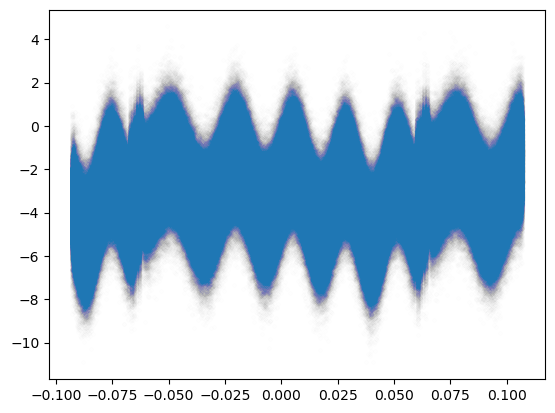

In [7]:
#plot all the data
plt.scatter(calibration_time_ch1,mean_calibration_ch1,marker='.',alpha=1/256)
plt.show()

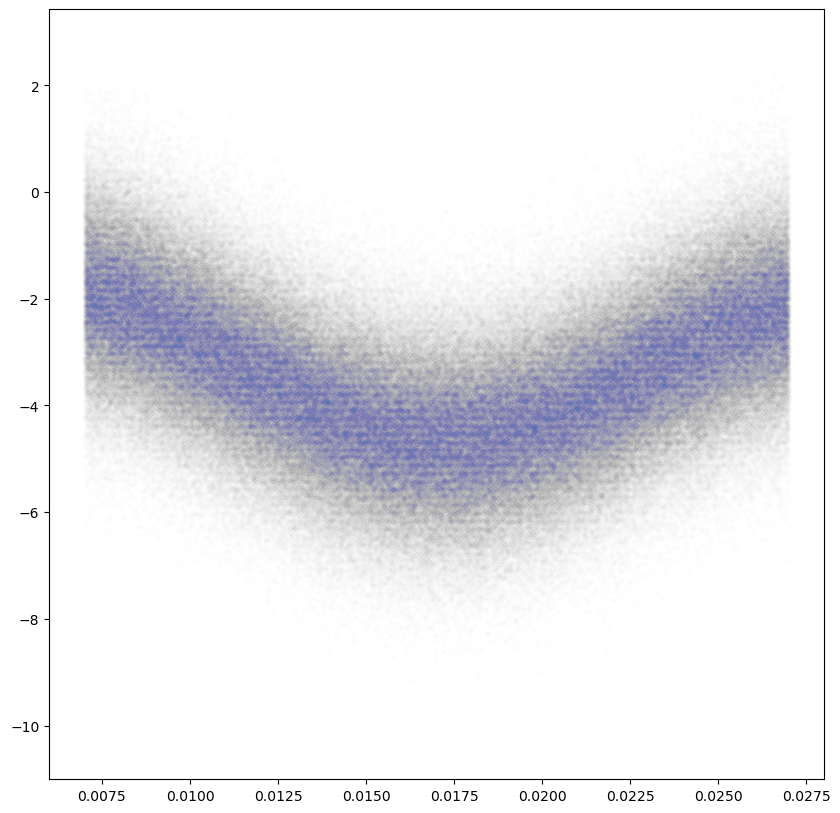

In [8]:
#plot zoomed in region and it looks actually quite good i think the above plot is "saturated"
plt.subplots(figsize=(10, 10))
plt.scatter(calibration_time_ch1[2500000:3000000],mean_calibration_ch1[2500000:3000000],marker='.',alpha=1/256)
plt.show()

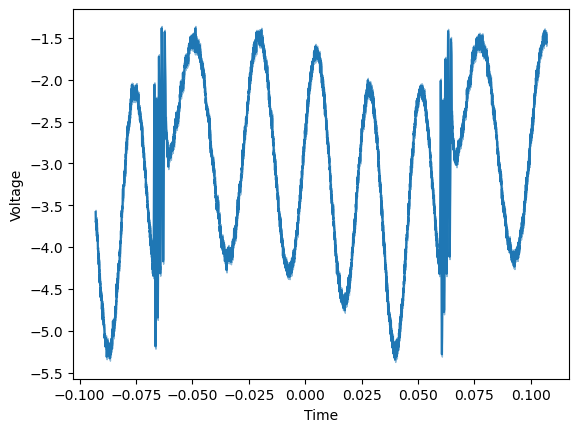

In [9]:
#work out averages by grouping

N_GROUPS=5000
group_step_ch1=N_POINTS//N_GROUPS
#group_step_ch2=(calibration_time_ch1.size)//N_GROUPS

mean_calibration_time_ch1=np.zeros(N_GROUPS)
#mean_times_ch2=np.zeros(N_GROUPS)
mean_mean_calibration_ch1=np.zeros(N_GROUPS)
err_mean_calibration_ch1=np.zeros(N_GROUPS)

w=1/(std_calibration_ch1/np.sqrt(N_MEASUREMENTS-1))**2
x=mean_calibration_ch1

for i in range(N_GROUPS):
    mean_calibration_time_ch1[i]=np.mean(np.array(calibration_time_ch1[i*group_step_ch1:(i+1)*group_step_ch1]))
    mean_mean_calibration_ch1[i]=np.sum(x[i*group_step_ch1:(i+1)*group_step_ch1]*w[i*group_step_ch1:(i+1)*group_step_ch1])/np.sum(w[i*group_step_ch1:(i+1)*group_step_ch1])
    err_mean_calibration_ch1[i]=np.sqrt(1/np.sum(w[i*group_step_ch1:(i+1)*group_step_ch1]))


#plt.errorbar(mean_times_ch2, mean_voltages_ch2,yerr=std_voltages_ch2,linestyle="",marker='.')
#plt.errorbar(mean_times_ch1, mean_voltages_ch1,yerr=std_voltages_ch1,linestyle="",marker='.')
plt.plot(mean_calibration_time_ch1,mean_mean_calibration_ch1)
plt.fill_between(
    x=mean_calibration_time_ch1,
    y1=mean_mean_calibration_ch1+err_mean_calibration_ch1,
    y2=mean_mean_calibration_ch1-err_mean_calibration_ch1,
    alpha=0.5,
    color='C0'
)

plt.xlabel('Time')
plt.ylabel('Voltage')

plt.show()

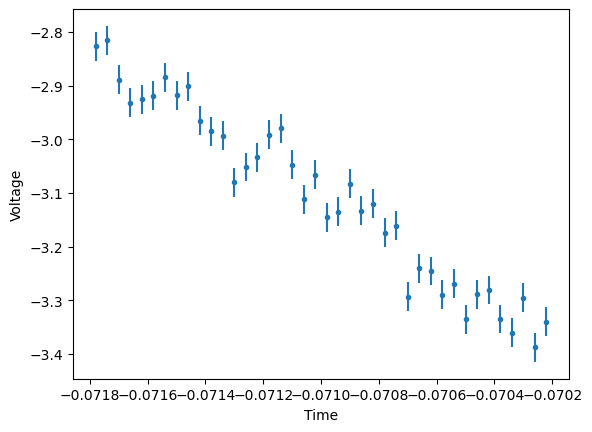

In [10]:
#zomed in error plot to see if the errors look apropriet and they look okay

plt.errorbar(x=mean_calibration_time_ch1[530:570],y=mean_mean_calibration_ch1[530:570],yerr=err_mean_calibration_ch1[530:570],linestyle="",marker='.')


plt.xlabel('Time')
plt.ylabel('Voltage')

plt.show()

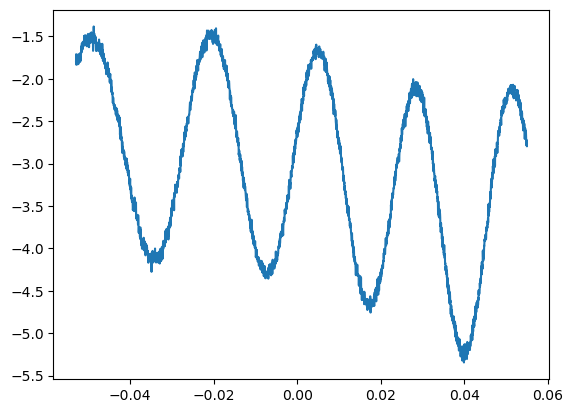

In [11]:
#now we are cropping the data
ct=mean_calibration_time_ch1[1000:3700]
cv=mean_mean_calibration_ch1[1000:3700]
ce=err_mean_calibration_ch1[1000:3700]

plt.plot(ct,cv)
plt.show()

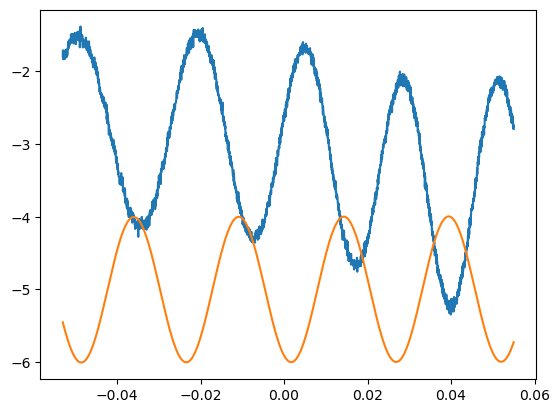

In [12]:
#function to fit, at a guess its the sum of a quadrosoinal plus a quadratic
def fit(t,A0,B0,B1,B2,C0,C1,C2):
    return (A0)*(np.sin(B2*t**2+B1*t+B0))+(C2*t**2+C1*t+C0)
    
p0=[1,-2,250,0.1,-5,0.1,0.1]

plt.plot(ct,cv)
plt.plot(ct,fit(ct,*p0))
plt.show()

In [13]:
#force any paramiter with an initial value of zero to remain zero
def f(t,*p):
    new_p=[]
    for i in range(len(p)):
        if p0[i]!=0:
            new_p.append(p[i])
        else:
            new_p.append(0)
    return fit(t,*new_p)

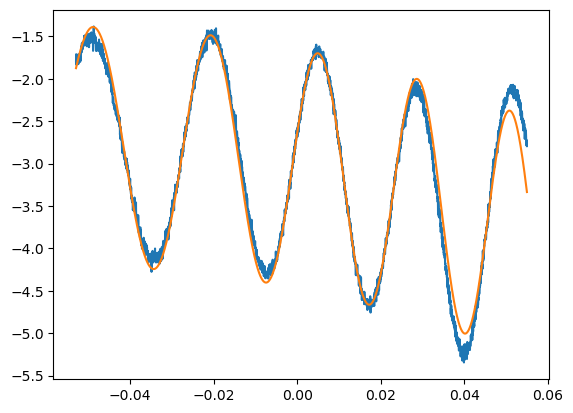

[ -1.41106825  -2.83271714 250.91342581 403.20828328  -3.05997813
  -9.70346349 -89.94775099]


In [14]:
#optimise paramiters
popt,pcov=curve_fit(
    f=f,
    xdata=ct,
    ydata=cv,
    p0=p0,
    sigma=ce,
    absolute_sigma=True
)

plt.plot(ct,cv)
plt.plot(ct,fit(ct,*popt))
plt.show()

print(popt)



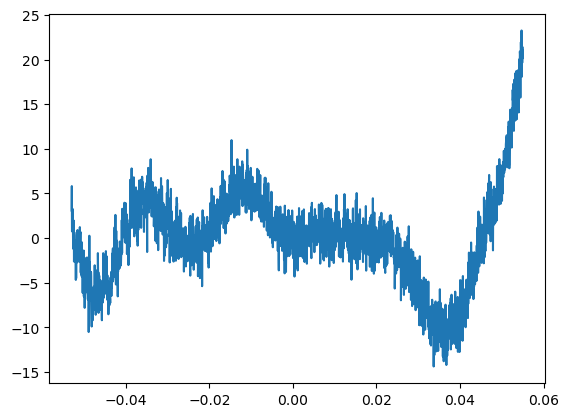

reduced chi squared = 28.095638632433385


In [15]:
#plotting residuals
plt.plot(ct,(cv-fit(ct,*popt))/ce)
plt.show()

print("reduced chi squared =",np.sum(((cv-fit(ct,*popt))/ce)**2)/(len(ct)-len(p0)))

In [16]:
#since we dont have channel 2 dataa we cant calculate the frequency at a given voltage however we can calculate the frequency at a given time and since the voltage settings wernt touched between the two measurements this should cancel out it also means that from now on we dont need to measure the voltage we can just set just measure the calibration and the spectum at the smae time i think but this might not be a good idea because of the fact we wont be able to zero our data but i dont even know if we want to do that in the first place arnt we just measuring the detuning

A0,B0,B1,B2,C0,C1,C2=u.correlated_values(popt,pcov)

L1=ufloat(0.065,0.005)
L2=ufloat(0.36,0.005)

def d(t):
    return (constants.c*(B2*t**2+B1*t)/(4*np.pi*(L1-L2)))
    


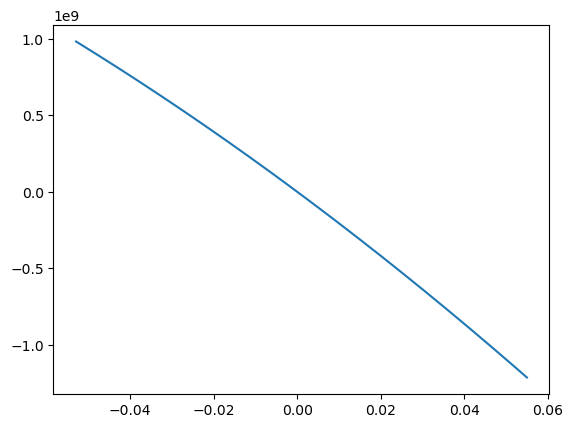

In [17]:
plt.plot(ct,unp.nominal_values(d(ct)))
plt.show()

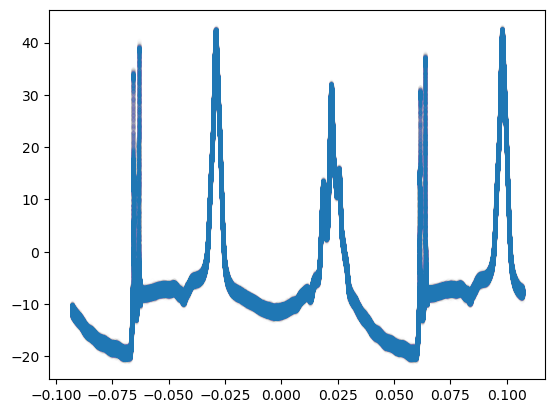

In [18]:
#plot all the data
plt.scatter(spectrum_time_ch1,mean_spectrum_ch1,marker='.',alpha=1/256)
plt.show()

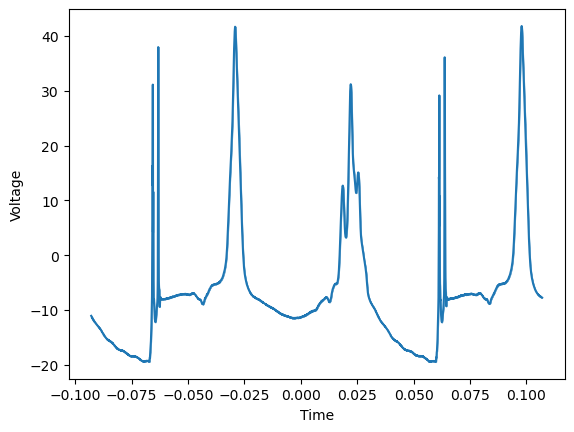

In [19]:
#work out averages by grouping

N_GROUPS=5000
group_step_ch1=N_POINTS//N_GROUPS
#group_step_ch2=(spectrum_time_ch1.size)//N_GROUPS

mean_spectrum_time_ch1=np.zeros(N_GROUPS)
#mean_times_ch2=np.zeros(N_GROUPS)
mean_mean_spectrum_ch1=np.zeros(N_GROUPS)
err_mean_spectrum_ch1=np.zeros(N_GROUPS)

w=1/(std_spectrum_ch1/np.sqrt(N_MEASUREMENTS-1))**2
x=mean_spectrum_ch1

for i in range(N_GROUPS):
    mean_spectrum_time_ch1[i]=np.mean(np.array(spectrum_time_ch1[i*group_step_ch1:(i+1)*group_step_ch1]))
    mean_mean_spectrum_ch1[i]=np.sum(x[i*group_step_ch1:(i+1)*group_step_ch1]*w[i*group_step_ch1:(i+1)*group_step_ch1])/np.sum(w[i*group_step_ch1:(i+1)*group_step_ch1])
    err_mean_spectrum_ch1[i]=np.sqrt(1/np.sum(w[i*group_step_ch1:(i+1)*group_step_ch1]))


#plt.errorbar(mean_times_ch2, mean_voltages_ch2,yerr=std_voltages_ch2,linestyle="",marker='.')
#plt.errorbar(mean_times_ch1, mean_voltages_ch1,yerr=std_voltages_ch1,linestyle="",marker='.')
plt.plot(mean_spectrum_time_ch1,mean_mean_spectrum_ch1)
plt.fill_between(
    x=mean_spectrum_time_ch1,
    y1=mean_mean_spectrum_ch1+err_mean_spectrum_ch1,
    y2=mean_mean_spectrum_ch1-err_mean_spectrum_ch1,
    alpha=0.5,
    color='C0'
)

plt.xlabel('Time')
plt.ylabel('Voltage')

plt.show()

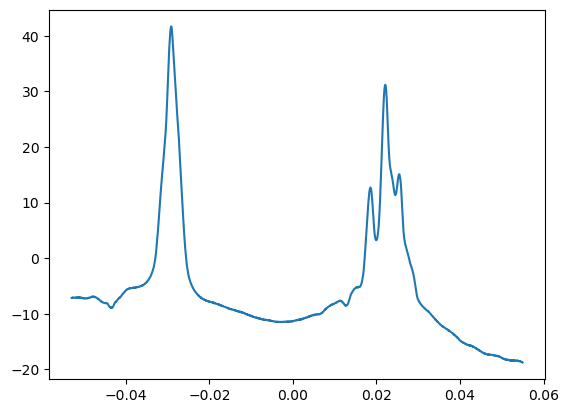

In [20]:
#now we are cropping the data
st=mean_spectrum_time_ch1[1000:3700]
sv=mean_mean_spectrum_ch1[1000:3700]
se=err_mean_spectrum_ch1[1000:3700]

plt.plot(st,sv)
plt.show()

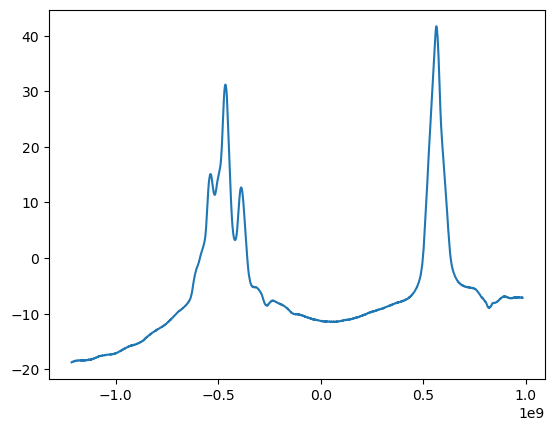

In [21]:
plt.plot(unp.nominal_values(d(st)),sv)
plt.show()

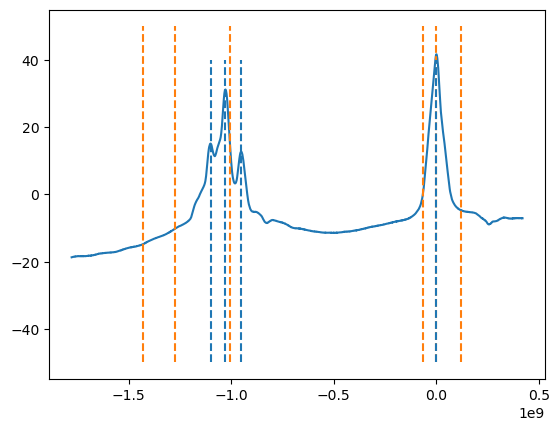

In [29]:
lines=(np.array([-1.1647,-1.2853,-1.3487,-2.2909,-2.5578,-2.7148]))*10**(9)

fre=unp.nominal_values(d(st))

peaks,_=find_peaks(sv,12)



mylines=np.sort(fre[peaks])
    
fre-=mylines[-1]
lines-= np.sort(lines)[-2]
mylines-=mylines[-1]

    
plt.plot(fre,sv)

for line in lines:
    plt.plot([line,line],[-50,50],color='C1',linestyle='--')
    
for line in mylines:
    plt.plot([line,line],[-50,40],color='C0',linestyle='--')



plt.savefig("28_11")